In [1]:
# Initial imports
import pandas as pd
import numpy as np

In [2]:
# Set the file path
file_path = "../Resources/national-home-sales.csv"

In [3]:
# Load time series data into Pandas
df_home_sales = pd.read_csv(file_path, index_col="period_end_date", parse_dates=True)

In [4]:
# Display sample data
df_home_sales.head(10)

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
2020-06-01,1219863,587635,310000
2020-07-01,1165359,700733,323000
2020-08-01,1066903,652878,328000
2012-02-01,2078931,304737,160000


In [9]:
df_home_sales.index.dtype

dtype('<M8[ns]')

In [6]:
df_home_sales.index.year.value_counts()

period_end_date
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2012    11
2020     8
Name: count, dtype: int64

In [5]:
df_home_sales.sort_index()

,inventory,homes_sold,median_sale_price
period_end_date,,,
2012-02-01,2078931,304737,160000
2012-03-01,2120173,394034,171000
2012-04-01,2155803,404927,178000
2012-05-01,2163303,464281,186000
2012-06-01,2145658,487959,194000
...,...,...,...
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
2020-06-01,1219863,587635,310000


In [11]:
# Sort the DataFrame index in ascending order
df_home_sales = df_home_sales.sort_index()


# Display sample data
df_home_sales.head(10)

,inventory,homes_sold,median_sale_price
period_end_date,,,
2012-02-01,2078931,304737,160000
2012-03-01,2120173,394034,171000
2012-04-01,2155803,404927,178000
2012-05-01,2163303,464281,186000
2012-06-01,2145658,487959,194000
2012-07-01,2109202,451243,192000
2012-08-01,2048712,485480,190000
2012-09-01,2010080,392397,187000
2012-10-01,1936114,423079,185000


In [20]:
df_home_sales['inventory']

period_end_date
2012-02-01    2078931
2012-03-01    2120173
2012-04-01    2155803
2012-05-01    2163303
2012-06-01    2145658
               ...   
2020-04-01    1297460
2020-05-01    1289500
2020-06-01    1219863
2020-07-01    1165359
2020-08-01    1066903
Name: inventory, Length: 103, dtype: int64

In [18]:
type(df_home_sales['inventory'])
type(df_home_sales[['inventory']])

pandas.core.frame.DataFrame

<Axes: xlabel='period_end_date'>

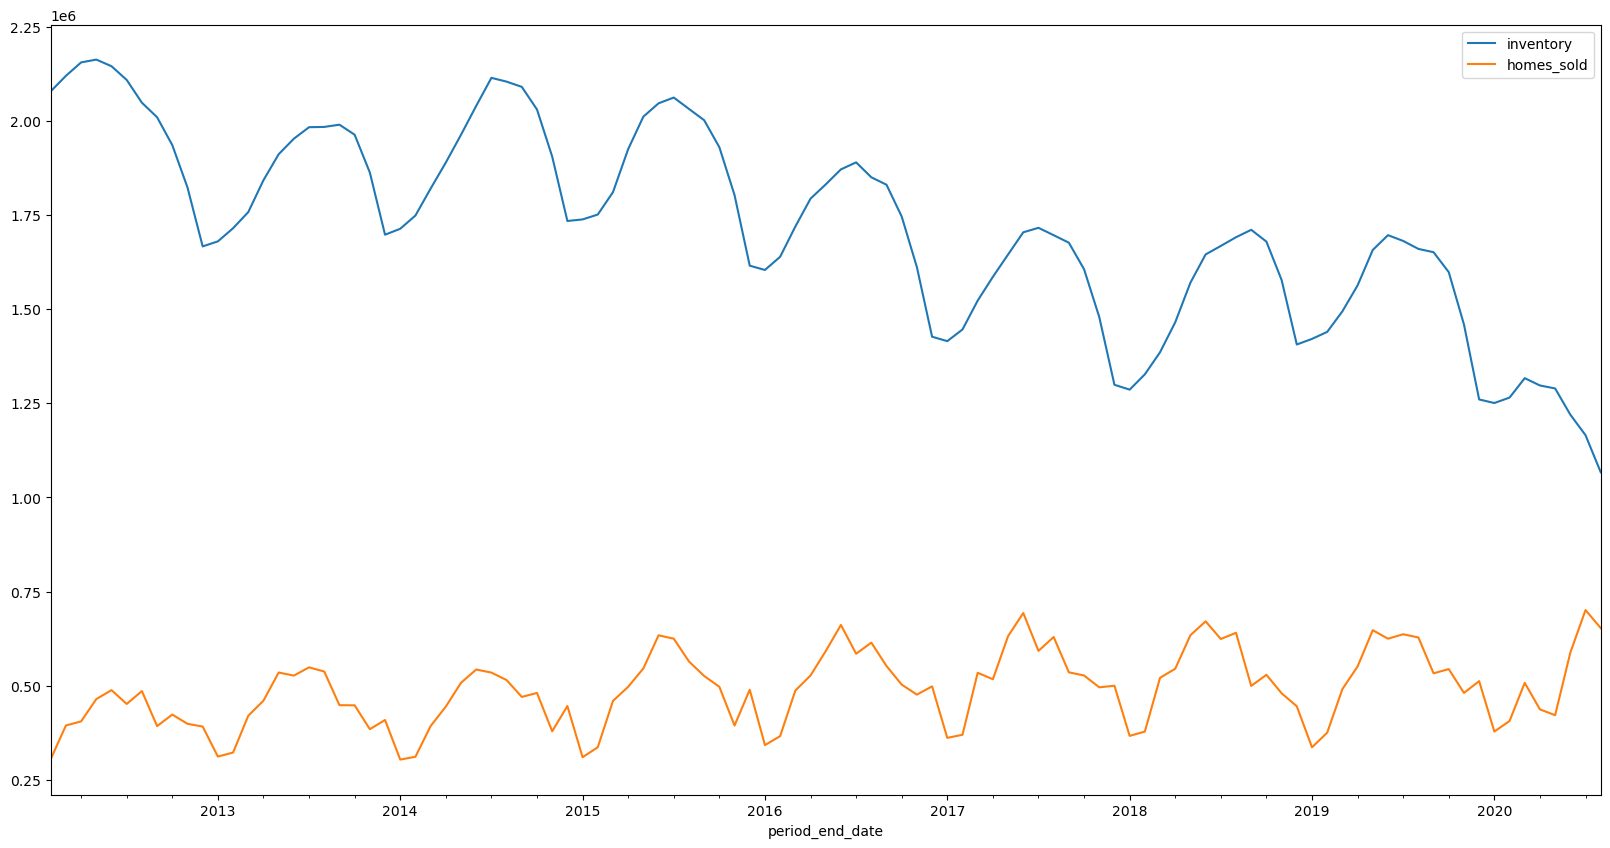

In [13]:
# Plot the inventory and homes_sold series
df_home_sales[['inventory', 'homes_sold']].plot(figsize = (20, 10))

In [34]:
# Select homes sold in 2014 using the year
# df_home_sales['homes_sold'].loc['2015']
sales_2014 = df_home_sales['homes_sold'].loc[df_home_sales.index.year==2014]


# Display 2014 home sales data
sales_2014

period_end_date
2014-01-01    303454
2014-02-01    310918
2014-03-01    392509
2014-04-01    444227
2014-05-01    507516
2014-06-01    542753
2014-07-01    534616
2014-08-01    514686
2014-09-01    469975
2014-10-01    480451
2014-11-01    378599
2014-12-01    445766
Name: homes_sold, dtype: int64

<Axes: title={'center': 'Homes Sold in 2014'}, xlabel='period_end_date'>

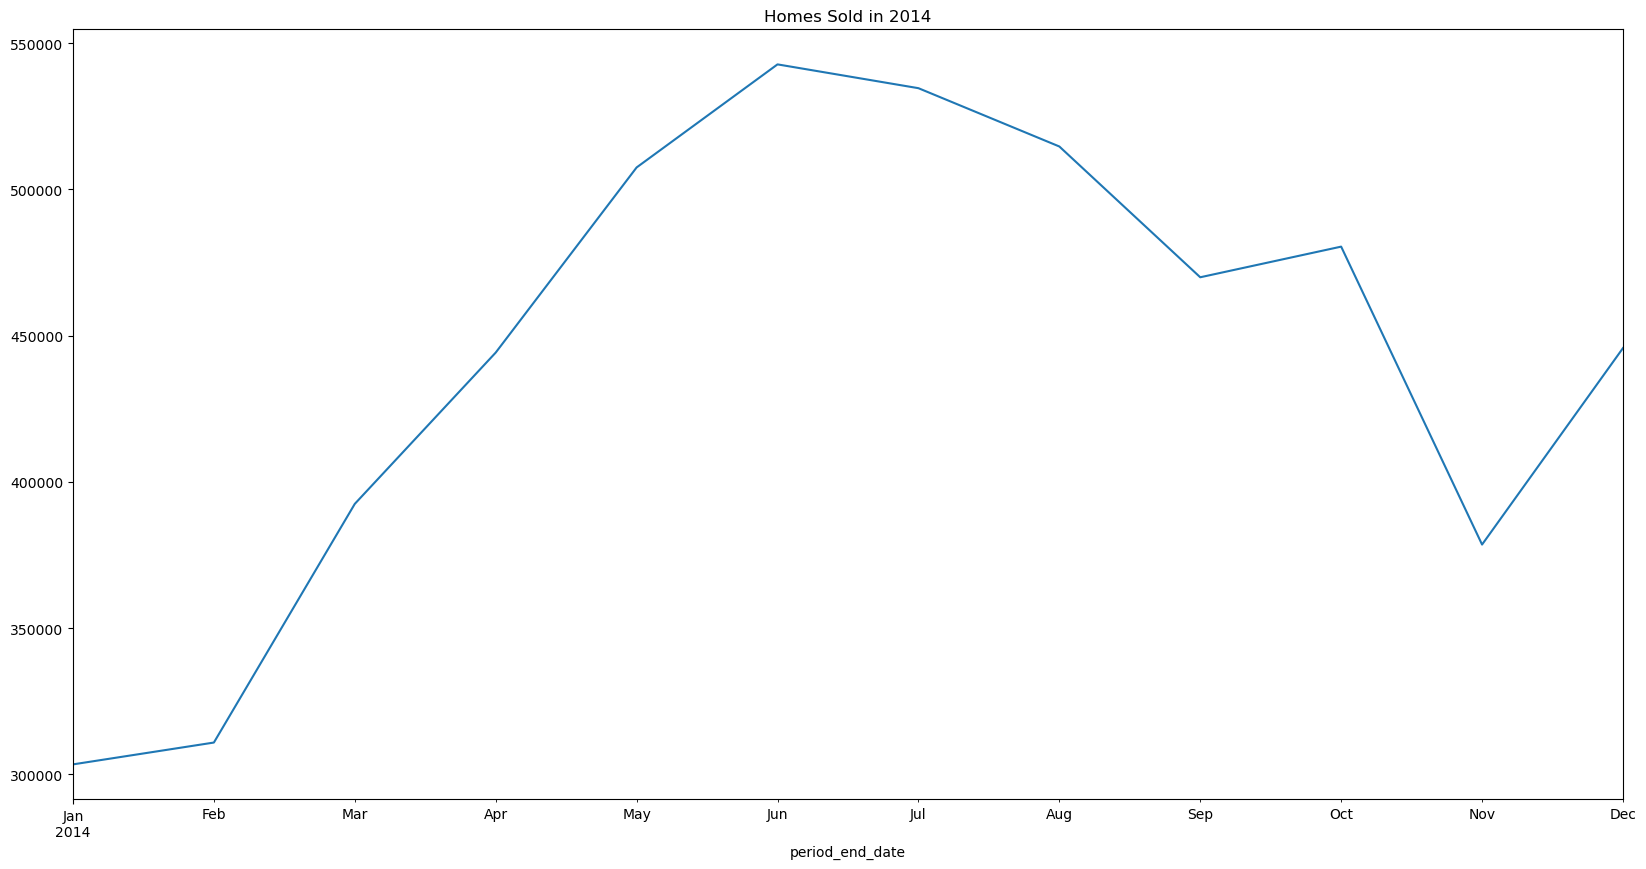

In [35]:
# Plot 2014 home sales data
sales_2014.plot(figsize=(20,10), title="Homes Sold in 2014")

In [40]:
# Compute the total home sales per quarter
quarterly_home_sales = df_home_sales['homes_sold'].groupby(df_home_sales.index.quarter).sum()

In [41]:
# Display total home sales per quarter
quarterly_home_sales

period_end_date
1    10081561
2    14788243
3    14518462
4    11126303
Name: homes_sold, dtype: int64

<Axes: title={'center': 'Home sales by quarter'}, xlabel='period_end_date'>

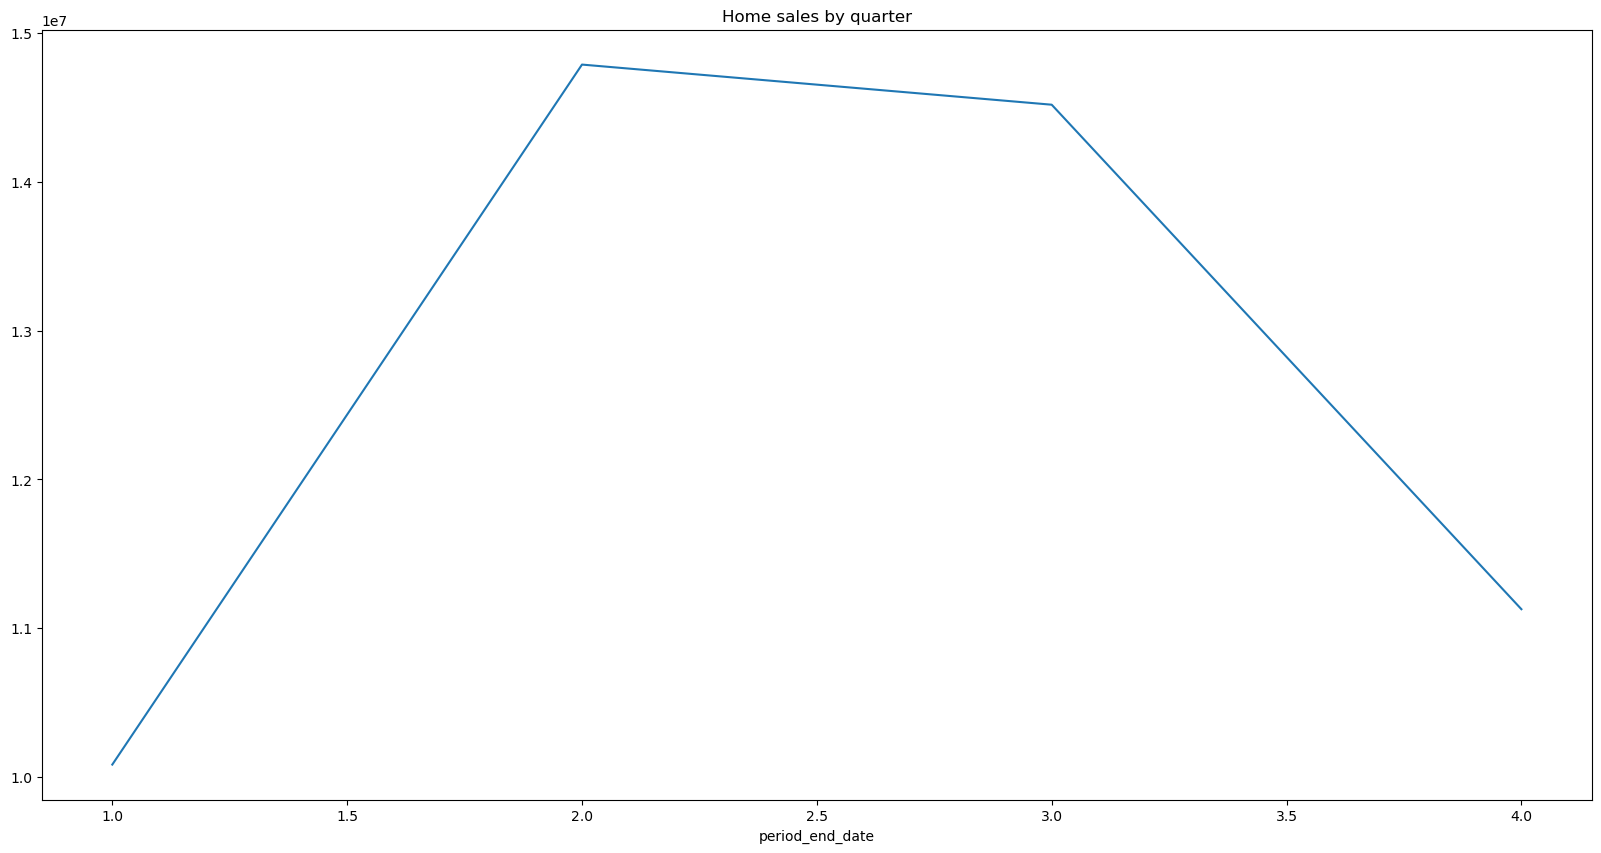

In [42]:
# Plot total home sales per quarter
quarterly_home_sales.plot(title="Home sales by quarter", figsize=(20,10))

<Axes: xlabel='period_end_date'>

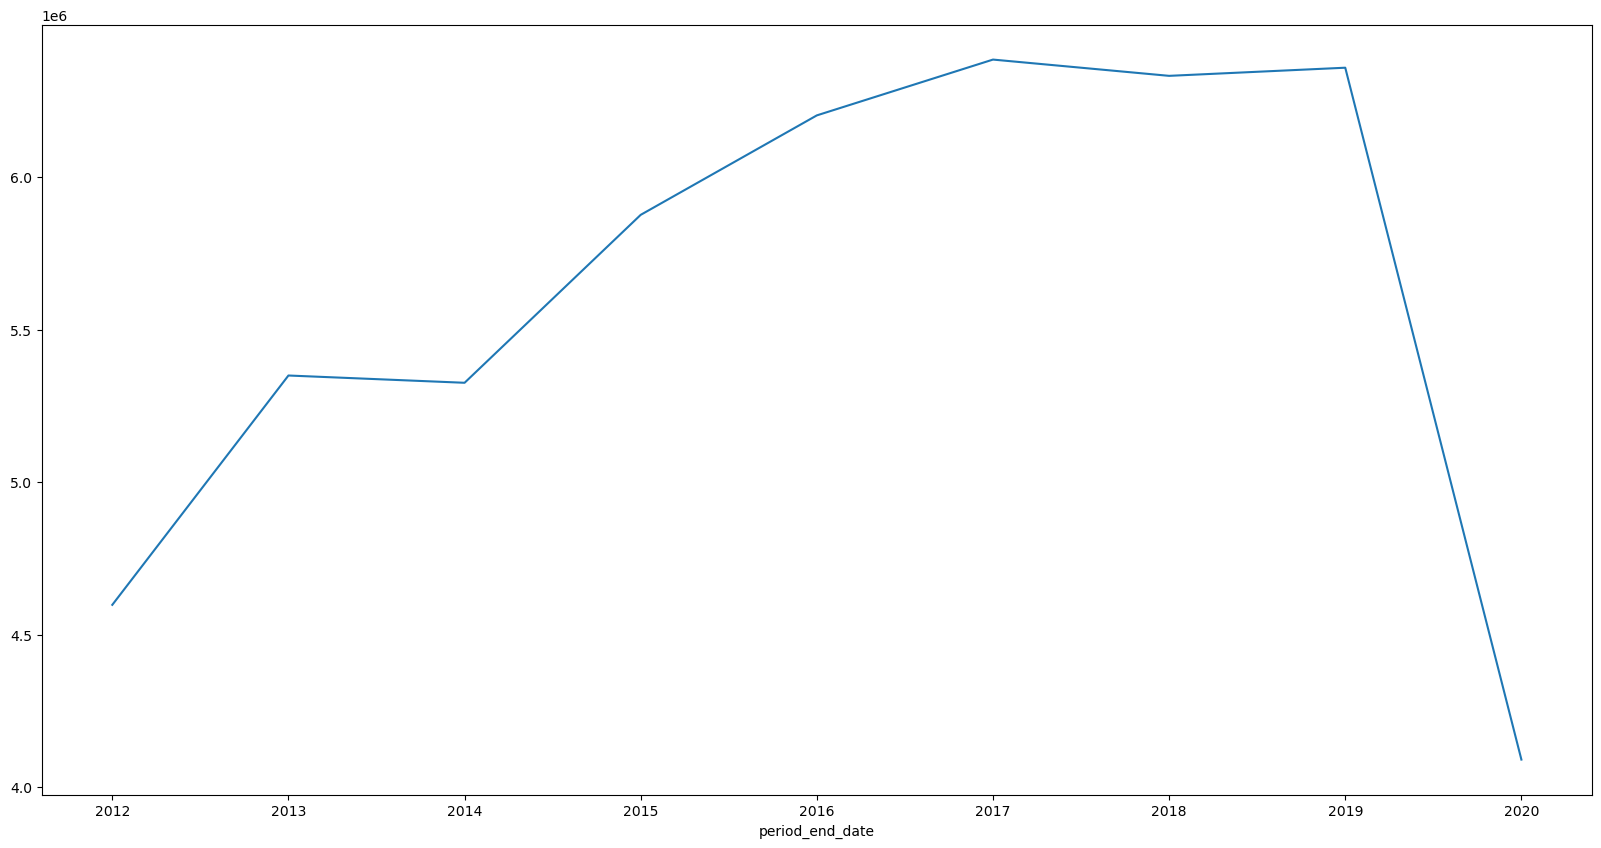

In [46]:
# Compute total quarterly home sales per year
home_sales_by_year = df_home_sales['homes_sold'].groupby([df_home_sales.index.year]).sum()
home_sales_by_year.plot(figsize=(20,10))

In [53]:
# Compute total quarterly home sales per year
quarterly_home_sales_by_year = df_home_sales['homes_sold'].groupby([df_home_sales.index.year, 
                                                                    df_home_sales.index.quarter]).sum()

In [54]:
# Display total quarterly home sales per year
quarterly_home_sales_by_year = quarterly_home_sales_by_year.sort_index()

In [55]:
quarterly_home_sales_by_year

period_end_date  period_end_date
2012             1                   698771
                 2                  1357167
                 3                  1329120
                 4                  1212750
2013             1                  1053470
                 2                  1521401
                 3                  1533894
                 4                  1240531
2014             1                  1006881
                 2                  1494496
                 3                  1519277
                 4                  1304816
2015             1                  1105378
                 2                  1676173
                 3                  1714455
                 4                  1379792
2016             1                  1194478
                 2                  1779674
                 3                  1750930
                 4                  1476636
2017             1                  1264554
                 2                  1841266

<Axes: xlabel='period_end_date,period_end_date'>

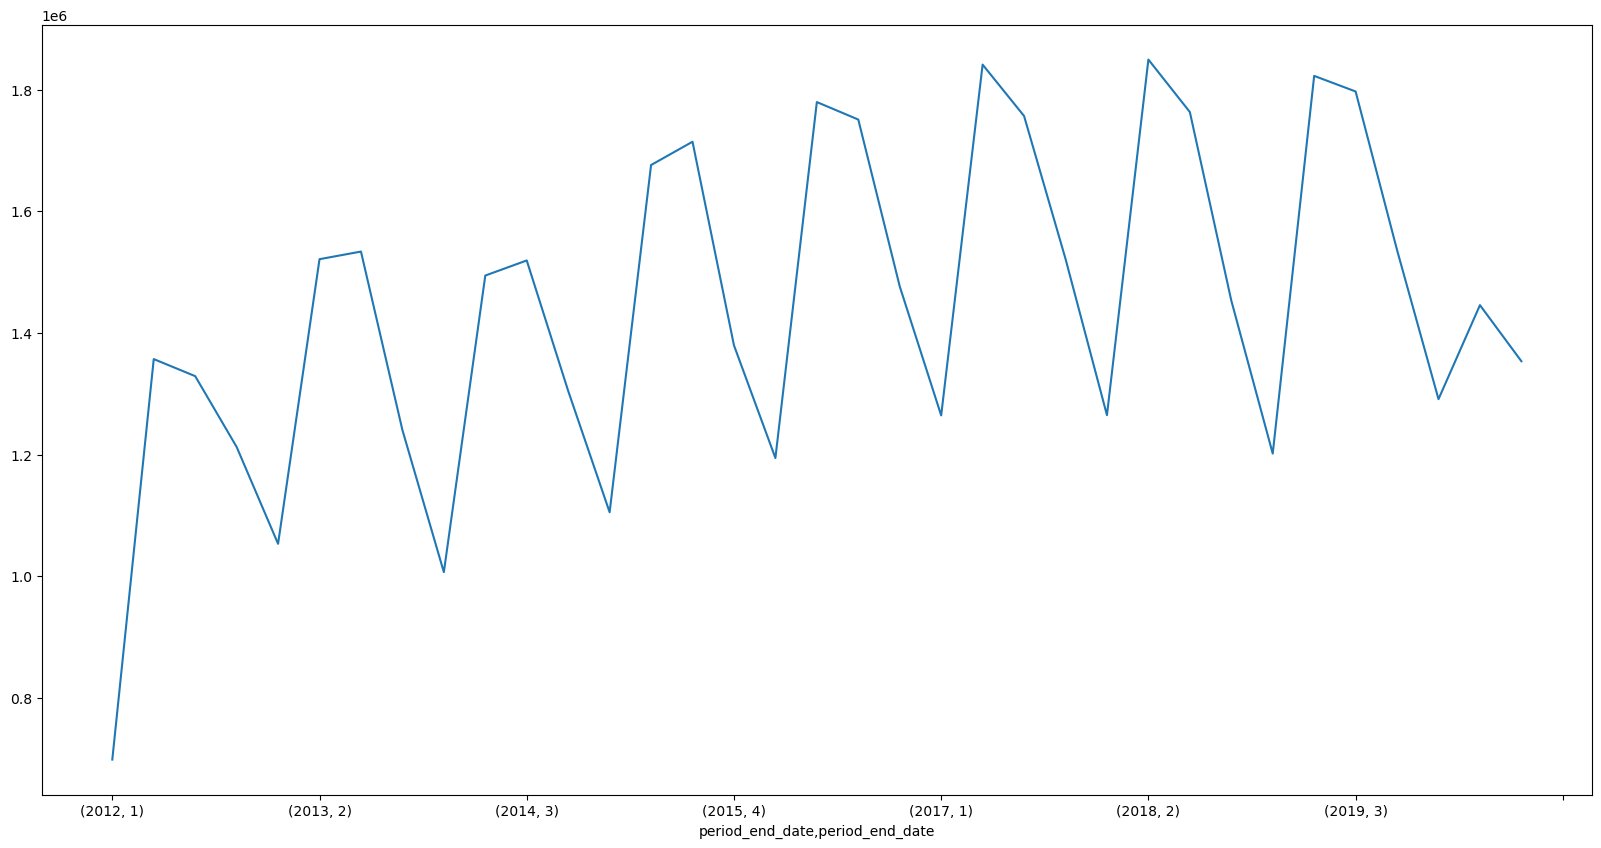

In [57]:
# Plot total quarterly home sales per year
quarterly_home_sales_by_year.plot(figsize=(20, 10))